In [2]:
import numpy as np
import pandas as pd

In [3]:
!head -n 10 ./raw_data.csv

In [4]:
raw = pd.read_csv('./raw_data.csv', names=['name', 'group'], header=None)

In [57]:
with open('data.json', 'w', encoding='utf-8') as file:
    raw.to_json(file, force_ascii=False)

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['group'])

groups = le.transform(train['group']) + 1

In [88]:
products = raw[raw['group'].notnull()].copy()
products['group'] = groups

with open('products.csv', 'w', encoding='utf-8') as file:
    products[['name', 'group']].to_csv(file, header=False, index=False)

In [90]:
products = raw[raw['group'].isnull()].copy()

with open('products_unclassified.csv', 'w', encoding='utf-8') as file:
    products[['name']].to_csv(file, header=False, index=False)

In [87]:
with open('groups.csv', 'w', encoding='utf-8') as file:
    pd.DataFrame({'name': le.classes_}).to_csv(file, header=False, index=False)

In [5]:
raw.shape

(36722, 2)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36722 entries, 0 to 36721
Data columns (total 2 columns):
name     36722 non-null object
group    7291 non-null object
dtypes: object(2)
memory usage: 573.9+ KB


In [7]:
raw.describe()

name             group
count                             36722              7291
unique                            36721                20
top     ШОКОЛАД ВОЗДУШНЫЙ ТЕМНЫЙ 8500 г  батончик сладкий
freq                                  2              3897

In [8]:
test = raw[raw['group'].isnull()].copy()
test.reset_index(drop=True, inplace=True)
test.describe()

name  group
count                             29431    0.0
unique                            29430    0.0
top     ШОКОЛАД ВОЗДУШНЫЙ ТЕМНЫЙ 8500 г    NaN
freq                                  2    NaN

In [9]:
train = raw[raw['group'].notnull()].copy()
train.reset_index(drop=True, inplace=True)
train.describe()

name             group
count                                        7291              7291
unique                                       7291                20
top     батончик "nut n go" арахис с клюквой 42г.  батончик сладкий
freq                                            1              3897

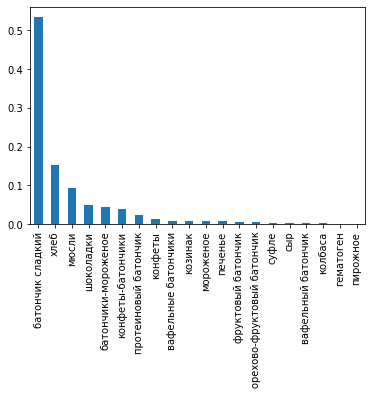

In [11]:
train['group'].value_counts(normalize=True).plot(kind='bar');

In [12]:
import re

regex = re.compile('[^a-zA-Zа-яА-Я ]')
# stop_words = {'упак'}

def clean(s):
    # remove non letters
    return ' '.join([w for w in regex.sub(' ', s.lower()).split(' ') if len(w) > 2])
    # remove measures

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    lowercase=True, 
    analyzer='char_wb', 
    preprocessor=clean,
    ngram_range=(2, 3)
)

X = vectorizer.fit_transform(train['name'])

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['group'])

train['group_encoded'] = le.transform(train['group'])

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

clf = MultinomialNB()
clf.fit(X, train['group_encoded'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
from sklearn import metrics

y_pred_class = clf.predict(X)
metrics.accuracy_score(train['group_encoded'], y_pred_class)

0.9090659717459882

In [53]:
test = raw[raw['group'].isnull()]

X_test = vectorizer.transform(test['name'])

y_test = clf.predict(X_test)

y_test_groups = le.inverse_transform(y_test)

pd.DataFrame({'name': test['name'], 'group': y_test_groups})

In [94]:
train = raw[raw['group'].notnull()]
train

name                 group
0          Батончик вафельный Киндер Буено Т-2 43гр 1/30    вафельный батончик
15                            "Бабаевский" Батончик 50гр             шоколадки
24                  "БАТОН МОЛОДЕЖНЫЙ 0.38 нарезка/КХП/"                  хлеб
25                  "БАТОН МОЛОДЕЖНЫЙ 0.38 нарезка/KХП/"                  хлеб
26         "БАТОН МОСКОВСКИЙ" (НАРЕЗКА) Коломенское 400г                  хлеб
27                                 "БАТОН НАРЕЗНОЙ 0.5КГ                  хлеб
28                                 "БАТОН НАРЕЗНОЙ 0.5KГ                  хлеб
29              "БАТОН НАРЕЗНОЙ ПОЛОВИНКИ В УПАК 0.250КГ                  хлеб
30              "БАТОН НАРЕЗНОЙ ПОЛОВИНKИ В УПАK 0.250KГ                  хлеб
31                  "БАТОН НАРЕЗНОЙ РЕЗАНЫЙ В УПАК 0.5КГ                  хлеб
32                  "БАТОН НАРЕЗНОЙ РЕЗАНЫЙ В УПАK 0.5KГ                  хлеб
33         "БАТОН НАРЕЗНОЙ" (НАРЕЗКА) НИЖЕГОРОДСКИЙ 400г                  хлеб
34            "БАТОН НАРЕЗНОЙ" (нарезка) Пролетарец 400г                  хлеб
35                        "БАТОН НАРЕЗНОЙ" (ручная) 400г                  хлеб
36                                "Батон нарезной" 0,380                  хлеб
37                        "Батон нарезной" нарезка 0,380                  хлеб
38                   "БАТОН НАРЕЗНОЙ" НИЖЕГОРОДСКИЙ 400г                  хлеб
39                   "БАТОН НАРЕЗНОЙ" НИЖЕГОРОДСКИЙ 600г                  хлеб
40                  "БАТОН ПОДМОСКОВНЫЙ" Пролетарец 200г                  хлеб
41                     "БАТОН С ОТРУБЯМИ НАР В УП 0.3 КГ                  хлеб
42                     "БАТОН С ОТРУБЯМИ НАР В УП 0.3 KГ                  хлеб
43              "БАТОНЧИК МОНСТЕР 50г. арахис икарамель"      батончик сладкий
44            "БАТОНЧИК МОНСТР 50г. арахиснуга карамель"  протеиновый батончик
45                     "БАТОНЧИК ОТРУБНОЙ в/с 0.35/КХП/"                  хлеб
46           "БАТОНЧИК" с творожно-малиновой начинкой кг               печенье
47                     "БАТОНЧИK ОТРУБНОЙ в/с 0.35/KХП/"                  хлеб
82                                      "ЕАС" Батон 350г                  хлеб
89         "КИНДЕР ПИНГВИ" шоколад. Молочный ломтик. 30г             шоколадки
122    "Малаховский" Колбаса Славянская с/к мал. бато...               колбаса
135    "нижегородский хлеб" батон нарезной нарезанный...                  хлеб
...                                                  ...                   ...
36456                      kitkat двойной батончик 58 г.      батончик сладкий
36457    kitkat молочный шоколад с хрустящей вафлей 40 г      батончик сладкий
36468                LUCKYSNACKY фруктовый батончик 30гр    фруктовый батончик
36522    majestik батончик c нуг.с аром.кок с глаз.  20г      батончик сладкий
36523             шоколадный батончик snickers super 95г      батончик сладкий
36524  Шоколадный батончик SNICKERS SUPER с жареным а...      батончик сладкий
36525               шоколадный батончик snickers50 50,5г      батончик сладкий
36526            шоколадный батончик snikers криспер 40г      батончик сладкий
36559                   milkyway 1+1 шок. батончик 52 г.      батончик сладкий
36560                     mixmey батончик фрукт. ябл/клу  протеиновый батончик
36561                     mixmey батончик фрукт. ябл/пер  протеиновый батончик
36569                                 nats шоколад 50 г.      батончик сладкий
36593                              Nut N Go батончик 32г                 мюсли
36643                     Батончик Бонавита клубника 40г      батончик сладкий
36644                     Батончик Бонавита ореховый 35г      батончик сладкий
36645       батончик мюсли дыня в йогуртовой глазури 30г                 мюсли
36646       pinkpie батончик нуга со вкусом клубн. 40 г.      батончик сладкий
36650              Шоколадный батончик Snikers Super 80г      батончик сладкий
36698                                Slendy батончик 42г      батончик сладкий
36699    Шоколыдный бат

In [89]:
test

name group
1                             ВОЗДУШНЫЙ молочный шоколад   NaN
2       Пломбир ваниль. во взбит. шоколад. глаз. "Лак...   NaN
3       Пломбир эскимо "Кор из Корен" в мол.шокол. гл...   NaN
4                    __шоколад alpen gold молочный  90 г   NaN
5      -45% ШОKОЛАД ГОРЬKИЙ С АПЕЛЬСИНОВЫМ СОKОМ KОММ...   NaN
6      -45% ШОKОЛАД ГОРЬKИЙ KОМУНАРKА БЕЛОВЕЖСKИЯ ПУЩ...   NaN
7      -45% ШОKОЛАД МОЛОЧНЫЙ С НАЧИНKОЙ ТРЮФЕЛЬНЫЙ ЭЛ...   NaN
8            -45% ШОKОЛАД KОМУНАРKА ТРЮФЕЛЬНЫЙ ЭЛИТ 200Г   NaN
9      !КРАФТ ШОКОЛАД МИЛКА МОЛОЧНЫЙ С СОЛЕНЫМ КРЕКЕР...   NaN
10     " Коровка из Кореновки " эскимо шоколадное в ш...   NaN
11                         "48 коп" шок. стаканчик 170мл   NaN
12                     "48 копеек" шок. ваф. рожок 200мл   NaN
13                      "48 Копеек"рожок шоколадн. 106гр   NaN
14     "Б.Ю. Александров" Сырок глаз. (суфле) глаз. в...   NaN
16             "Бабаевский" темн шоколад с фундуком 100г   NaN
17                    "Бабаевский" шоколад горький 100гр   NaN
18                  "Бабаевский" шоколад фирменный 100гр   NaN
19                "Бабаевский" шоколад элитный 75% 100гр   NaN
20     "БАРНИ МЕДВЕЖЕНОК" с шоколадной нач. + подарок...   NaN
21           "БАРНИ МЕДВЕЖЕНОК" с ШОКОЛАДНОЙ нач. 150 г.   NaN
22            "БАРНИ МЕДВЕЖЕНОК" с шоколадной нач. 150г.   NaN
23             "БАРНИ МЕДВЕЖЕНОК" с шоколадной нач. 30г.   NaN
48                                 "Буланжерия" Шоко 1кг   NaN
49                                     "Ван" Шоколад 1кг   NaN
50                   "ВАФЛИ ХРУСТУС шоколадный вкус25г."   NaN
51                        "ВАФЛИ ШОКОЛАДНЫЕ вес.КОЛОБОК"   NaN
52          "Вдохновение" шоколад горьк.с минд.75% 100гр   NaN
53              "Вдохновение" шоколад классический 100гр   NaN
54        "Вологодский" эскимо в шок/глаз. с фунд. 75гр.   NaN
55                    "ГОРЯЧИЙ ШОКОЛАД 22г.классический"   NaN
...                                                  ...   ...
36680     ritter sport мол шоколад с нач карам мусс 100г   NaN
36681        Ritter Sport Молочный шок с клубн в йогурте   NaN
36682            Ritter Sport Молочный шок с лесн орехом   NaN
36683               Ritter Sport Молочный шок с печеньем   NaN
36684             Ritter Sport Тёмный шок с мятой 100 гр   NaN
36685                 ritter sport шоколад в асс. 100 г.   NaN
36686  saldens double chocolate stout 0,5л с. 7,0% шо...   NaN
36687      schogetten шоколад альпийский молочный 100 г.   NaN
36688  schogetten шоколад альпийский молочный с фунду...   NaN
36689                    schogetten шоколад белый 100 г.   NaN
36690  schogetten шоколад молочный с нач. шок. крем б...   NaN
36691            schogetten шоколад black & white 100 г.   NaN
36692  schwarzkopf  igora royal крем-краска   4-6 сре...   NaN
36693  schwarzkopf  igora royal крем-краска   4-63 ср...   NaN
36694  schwarzkopf  igora royal крем-краска   6-6 тем...   NaN
36695  schwarzkopf  igora royal крем-краска   7-65 ср...   NaN
36696  schwarzkopf  igora royal крем-краска   8-65 св...   NaN
36697        skinlite маска коллаг/экстр зел чая д/л23мл   NaN
36704                   sobranie горький шоколад <12500>   NaN
36705  splat дет.з/п 2-6лет kids молочный шоколад  50мл.   NaN
36708                super bat пластины от комаров 10 шт   NaN
36709  sweet pack машмеллоу хруст в мол шок/бельгия/ 50г   NaN
36710  tondi  печенье  затяжное  сендвич  с шоколадны...   NaN
36711  tondi  печенье  затяжное  сендвич  с шоколадны...   NaN
36714  wella крем-краска color touch 4\77 горячий шок...   NaN
36715  wella крем-краска koleston perfekt 4/77 горячи...   NaN
36716  wellaton №4/0 стойкая крем-краска "темный шоко...   NaN
36717  wellaton №6/73 стойкая крем-краска "молочный ш...   NaN
36718  wellaton №6/77 стойкая крем-краска "горкий шок...   NaN
36720         YOTA Крекер Рыбка в мол. шок. глазури 40гр   NaN

[29431 rows x 2 columns]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

train = raw[raw['group'].notnull()].copy();
train.reset_index(drop=True, inplace=True)
name_train = train['name_norm']

vect = CountVectorizer()
vect.fit(name_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [99]:
features = pd.DataFrame(vect.transform(name_train).toarray(), columns=vect.get_feature_names())
features

absolute  alpen  amp  and  babyfox  bar  bars  baunty  belmanda  \
0            0      0    0    0        0    0     0       0         0   
1            0      0    0    0        0    0     0       0         0   
2            0      0    0    0        0    0     0       0         0   
3            0      0    0    0        0    0     0       0         0   
4            0      0    0    0        0    0     0       0         0   
5            0      0    0    0        0    0     0       0         0   
6            0      0    0    0        0    0     0       0         0   
7            0      0    0    0        0    0     0       0         0   
8            0      0    0    0        0    0     0       0         0   
9            0      0    0    0        0    0     0       0         0   
10           0      0    0    0        0    0     0       0         0   
11           0      0    0    0        0    0     0       0         0   
12           0      0    0    0        0    0     0       0         0   
13           0      0    0    0        0    0     0       0         0   
14           0      0    0    0        0    0     0       0         0   
15           0      0    0    0        0    0     0       0         0   
16           0      0    0    0        0    0     0       0         0   
17           0      0    0    0        0    0     0       0         0   
18           0      0    0    0        0    0     0       0         0   
19           0      0    0    0        0    0     0       0         0   
20           0      0    0    0        0    0     0       0         0   
21           0      0    0    0        0    0     0       0         0   
22           0      0    0    0        0    0     0       0         0   
23           0      0    0    0        0    0     0       0         0   
24           0      0    0    0        0    0     0       0         0   
25           0      0    0    0        0    0     0       0         0   
26           0      0    0    0        0    0     0       0         0   
27           0      0    0    0        0    0     0       0         0   
28           0      0    0    0        0    0     0       0         0   
29           0      0    0    0        0    0     0       0         0   
...        ...    ...  ...  ...      ...  ...   ...     ...       ...   
7261         0      0    0    0        0    0     0       0         0   
7262         0      0    0    0        0    0     0       0         0   
7263         0      0    0    0        0    0     0       0         0   
7264         0      0    0    0        0    0     0       0         0   
7265         0      0    0    0        0    0     0       0         0   
7266         0      0    0    0        0    0     0       0         0   
7267         0      0    0    0        0    0     0       0         0   
7268         0      0    0    0        0    0     0       0         0   
7269         0      0    0    0        0    0     0       0         0   
7270         0      0    0    0        0    0     0       0         0   
7271         0      0    0    0        0    0     0       0         0   
7272         0      0    0    0        0    0     0       0         0   
7273         0      0    0    0        0    0     0       0         0   
7274         0      0    0    0        0    0     0       0         0   
7275         0      0    0    0        0    0     0       0         0   
7276         0      0    0    0        0    0     0       0         0   
7277         0      0    0    0        0    0     0       0         0   
7278         0      0    0    0        0    0     0       0         0   
7279         0      0    0    0        0    0     0       0         0   
7280         0      0    0    0        0    0     0       0         0   
7281         0      0    0    0        0    0     0       0         0   
7282         0      0    0    0        0    0     0       0         0   
7283         0      0    0    0        0    0     0       0     

In [57]:
pd.concat([train['group'], features], axis=1)

group  absolute  alpen  amp  and  babyfox  bar  bars  \
0       вафельный батончик         0      0    0    0        0    0     0   
1                шоколадки         0      0    0    0        0    0     0   
2                     хлеб         0      0    0    0        0    0     0   
3                     хлеб         0      0    0    0        0    0     0   
4                     хлеб         0      0    0    0        0    0     0   
5                     хлеб         0      0    0    0        0    0     0   
6                     хлеб         0      0    0    0        0    0     0   
7                     хлеб         0      0    0    0        0    0     0   
8                     хлеб         0      0    0    0        0    0     0   
9                     хлеб         0      0    0    0        0    0     0   
10                    хлеб         0      0    0    0        0    0     0   
11                    хлеб         0      0    0    0        0    0     0   
12                    хлеб         0      0    0    0        0    0     0   
13                    хлеб         0      0    0    0        0    0     0   
14                    хлеб         0      0    0    0        0    0     0   
15                    хлеб         0      0    0    0        0    0     0   
16                    хлеб         0      0    0    0        0    0     0   
17                    хлеб         0      0    0    0        0    0     0   
18                    хлеб         0      0    0    0        0    0     0   
19                    хлеб         0      0    0    0        0    0     0   
20                    хлеб         0      0    0    0        0    0     0   
21        батончик сладкий         0      0    0    0        0    0     0   
22    протеиновый батончик         0      0    0    0        0    0     0   
23                    хлеб         0      0    0    0        0    0     0   
24                 печенье         0      0    0    0        0    0     0   
25                    хлеб         0      0    0    0        0    0     0   
26                    хлеб         0      0    0    0        0    0     0   
27               шоколадки         0      0    0    0        0    0     0   
28                 колбаса         0      0    0    0        0    0     0   
29                    хлеб         0      0    0    0        0    0     0   
...                    ...       ...    ...  ...  ...      ...  ...   ...   
7261      батончик сладкий         0      0    0    0        0    0     0   
7262      батончик сладкий         0      0    0    0        0    0     0   
7263    фруктовый батончик         0      0    0    0        0    0     0   
7264      батончик сладкий         0      0    0    0        0    0     0   
7265      батончик сладкий         0      0    0    0        0    0     0   
7266      батончик сладкий         0      0    0    0        0    0     0   
7267      батончик сладкий         0      0    0    0        0    0     0   
7268      батончик сладкий         0      0    0    0        0    0     0   
7269      батончик сладкий         0      0    0    0        0    0     0   
7270  протеиновый батончик         0      0    0    0        0    0     0   
7271  протеиновый батончик         0      0    0    0        0    0     0   
7272      батончик сладкий         0      0    0    0        0    0     0   
7273                 мюсли         0      0    0    0        0    0     0   
7274      батончик сладкий         0      0    0    0        0    0     0   
7275      батончик сладкий         0      0    0    0        0    0     0   
7276                 мюсли         0      0    0    0        0    0     0   
7277      батончик сладкий         0      0    0    0        0    0     0   
7278      батончик сладкий         0      0    0    0        0    0     0   
7279      батончик сладкий         0      0    0    0        0    0     0   
7280      батончик сладкий         0      0    0    0        0    0     0   
7281      батончи

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [2, 5, 7, 9]
}

grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(features, train['group'])

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
est = grid_clf.best_estimator_

In [62]:
est.fit(features, train['group'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
test = raw[raw['group'].isnull()]
vect.transform(test)

<2x1861 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [96]:
test_features = pd.DataFrame(vect.transform(test).toarray(), columns=vect.get_feature_names())

In [97]:
test_features

absolute  alpen  amp  and  babyfox  bar  bars  baunty  belmanda  belnuga  \
0         0      0    0    0        0    0     0       0         0        0   
1         0      0    0    0        0    0     0       0         0        0   

   ...  ягоды  янтарный  ярце  ярче  яхромский  яшkино  яшк  яшкин  яшкино  \
0  ...      0         0     0     0          0       0    0      0       0   
1  ...      0         0     0     0          0       0    0      0       0   

   яшкинотрюфельная  
0                 0  
1                 0  

[2 rows x 1861 columns]